# Clustering

## K-means clustering

Data in a one-dimensional feature space

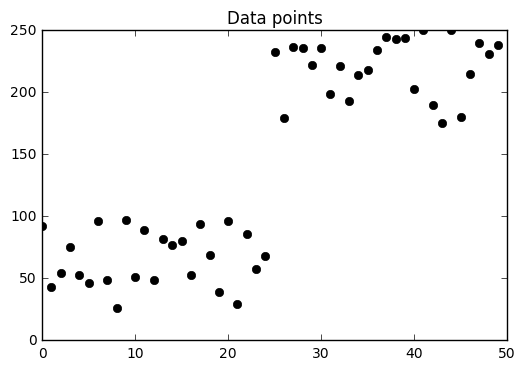

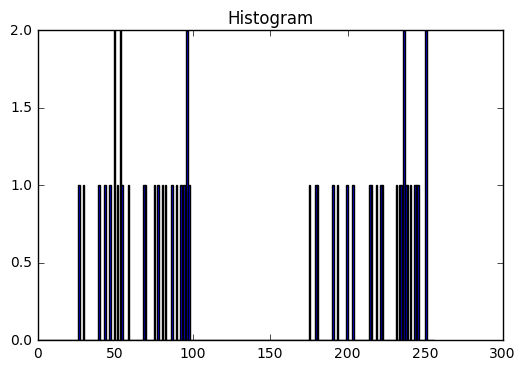

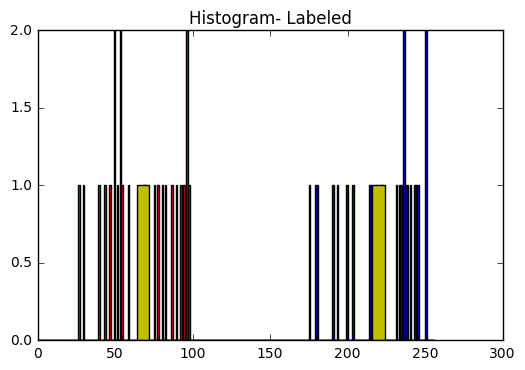

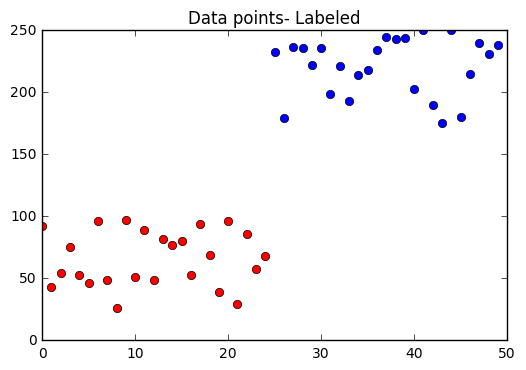

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Let's create a set of data with only one feature
# Some data points between 25 to 100
x1 = np.random.randint(25,100,25)
# Some data points between 175 to 255
x2 = np.random.randint(175,255,25)
# Stack them together
x = np.hstack((x1,x2))
# Always make sure that the data points are float32 and are stored in rows
# Each feature is arranged in a column, while each row corresponds to an input test sample
x = np.float32(x)
x = x.reshape((50,1))

# Display the data (as black (k) dots (o))
plt.plot(x,'ko')
plt.title('Data points')
plt.show()
# Display the histogram having 255 bins, between 0 to 255
plt.hist(x,256,[0,256])
plt.title('Histogram')
plt.show()

# Before calling opencv's kmeans, we need to specify the stop criteria
# Let's say either 100 iterations or accuracy of 1 is reached
# Define criteria = ( type, max_iter = 100 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Apply KMeans
# cv2.kmeans(Data,nClusters,criteria,nAttempts,flags)
# compactness: the sum of squared distance from each point to their corresponding centers
# labels: the label array (each element marked ‘0’,‘1’,‘2’ etc)
# centers: array of centers of clusters
compactness,labels,centers = cv2.kmeans(x,2,None,criteria,10,flags=cv2.KMEANS_RANDOM_CENTERS)

# Now we can easily split the data to different clusters depending on their labels
A = x[labels==0]
B = x[labels==1]

# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.title('Histogram- Labeled')
plt.show()

# display clustered data points ('A' in red, 'B' in blue, 'centers' in yellow)
i1 = np.arange(A.shape[0])
i2 = np.arange(A.shape[0],A.shape[0]+B.shape[0])
plt.plot(i1,A,'ro',i2,B,'bo')
plt.title('Data points- Labeled')
plt.show()

Data in a two-dimensional feature space

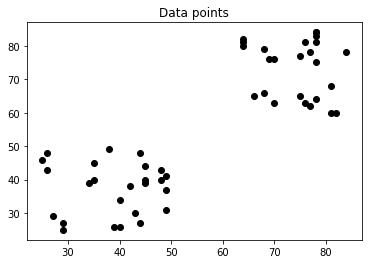

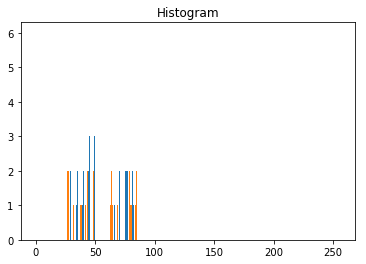

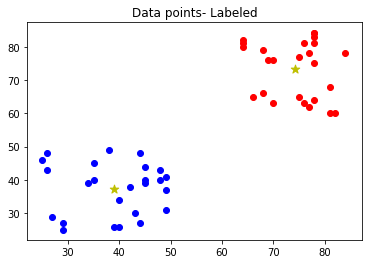

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create 2-D data points, each with 25 samples (features are stored in columns)
X1 = np.random.randint(25,50,(25,2))
X2 = np.random.randint(60,85,(25,2))
X = np.vstack((X1,X2)) # a 50x2 data matrix
# convert to np.float32
X = np.float32(X)

# Display the data (scatter plot)
plt.scatter(X[:,0],X[:,1],color='k')
plt.title('Data points')
plt.show()

# Specify the stop criteria
# Define criteria = ( type, max_iter = 100 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Apply KMeans
# cv2.kmeans(Data,nClusters,criteria,nAttempts,flags)
# compactness: the sum of squared distance from each point to their corresponding centers
# labels: the label array (each element marked ‘0’,‘1’,‘2’ etc)
# centers: array of centers of clusters
compactness,labels,centers = cv2.kmeans(X,2,None,criteria,10,flags=cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = X[labels.ravel()==0]
B = X[labels.ravel()==1]

# Plot the data
plt.hist(X,256,[0,256])
plt.title('Histogram')
plt.show()


plt.scatter(A[:,0],A[:,1],color = 'b')
plt.scatter(B[:,0],B[:,1],color = 'r')
plt.scatter(centers[:,0],centers[:,1],s = 80,color = 'y', marker = '*')
plt.title('Data points- Labeled')
plt.show()

RGB Data example: color quantization

[[157 106 103]
 [ 33  19  27]
 [ 51  46  67]
 [235 195 183]]
(960, 640, 3)
[[2]
 [2]
 [2]
 ..., 
 [1]
 [1]
 [1]]
labels size(614400, 1)
[[51 46 67]
 [51 46 67]
 [51 46 67]
 ..., 
 [33 19 27]
 [33 19 27]
 [33 19 27]]
[[[67 46 51]
  [67 46 51]
  [67 46 51]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]

 [[67 46 51]
  [67 46 51]
  [67 46 51]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]

 [[67 46 51]
  [67 46 51]
  [67 46 51]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]

 ..., 
 [[27 19 33]
  [27 19 33]
  [27 19 33]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]

 [[27 19 33]
  [27 19 33]
  [27 19 33]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]

 [[27 19 33]
  [27 19 33]
  [27 19 33]
  ..., 
  [27 19 33]
  [27 19 33]
  [27 19 33]]]
[[[46 67 51]
  [46 67 51]
  [46 67 51]
  ..., 
  [19 27 33]
  [19 27 33]
  [19 27 33]]

 [[46 67 51]
  [46 67 51]
  [46 67 51]
  ..., 
  [19 27 33]
  [19 27 33]
  [19 27 33]]

 [[46 67 51]
  [46 67 51]
  [46 67 51]
  ..., 
  [19 27 33]
  [19 27 33]


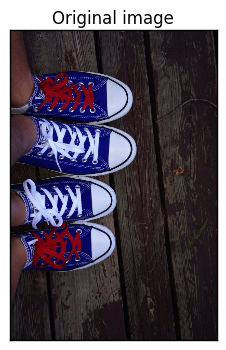

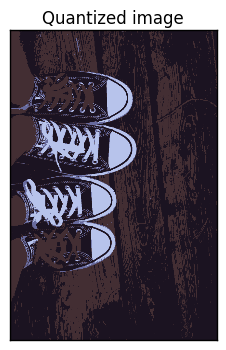

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load a colored image
#SAMPLES_DATA_DIR = 'C:/programs/opencv/sources/samples/data/'
img = cv2.imread('ash.jpg')

# Create an Nx3 data matrix (N: height x width)
X = img.reshape((-1,3))

# convert to np.float32
X = np.float32(X)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
K = 4
compactness,labels,centers=cv2.kmeans(X,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert RGB centroid back into uint8
centers = np.uint8(centers)
print centers
print img.shape
print labels
print 'labels size'+str(labels.shape)
print centers[labels.flatten()]
# Using the labels, apply centroid values (it is also R,G,B) to all pixels
res = centers[labels.flatten()]
# Reshape to the original image size
res = res.reshape((img.shape))
print res[:,:,[2,1,0]]
print res[:,:,[1,2,0]]
# Display
plt.imshow(img[:,:,[2,1,0]]) # BGR -> RGB
plt.xticks([]), plt.yticks([]), plt.title('Original image')
plt.show()

plt.imshow(res[:,:,[2,1,0]]) # BGR -> RGB
plt.xticks([]), plt.yticks([]), plt.title('Quantized image')
plt.show()